In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log, sqrt, exp, pi, cos
from scipy import stats as st
import seaborn as sns
sns.set(color_codes=True)

sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)


import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; font-size: 30px; text-align: center; margin-bottom: 40px;">Trabajo Práctico 1</h2>

<div style="border: 1px solid #d2d2d2; border-top: none; border-radius: 8px; margin-bottom: 40px;">
    <h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #38a2ad; color: #fff; border-radius: 4px; margin-bottom: 20px; margin-top: 0; border-bottom-left-radius: 0;  border-bottom-right-radius: 0;">Alumnos</h2>
    <div style="width: 450px; margin: 0 auto 30px;">
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Nombre y Apellido</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Padrón</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Gaston Montes</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">89397</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Lucas Risaro</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">94335</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Alcala Santiago</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">95172</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Mauro Di Pietro</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">93695</p>
            </div>
        </div>
    </div>
</div>

<h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #db2e2e; color: #fff; border-radius: 4px; margin-bottom: 30px;">Grupo</h2>

### Ejercicio 1
Utilizando  Matlab, Octaveo  Python implementar  un  Generador  Congruencial  Lineal  (GCL)  de  módulo $2^{32}$, multiplicador 1013904223,  incremento  de 1664525 y  semilla igual  a  la  parte  entera  del  promedio de  los  números de  padrón  de  los integrantes del grupo.
* Informar los primeros 10 números al azar de la secuencia.
* Modificar el GCL para que devuelva números al azar entre 0 y 1
* Realizar un histograma mostrando 100.000 valores generados en el punto b.

---

**Método Lineal Congruente [Lehmer, 1949] **

$U(n) = (Ua(n-1) + c)\mod m, \quad n\geq 0$

$m, \quad \text {el modulo};\quad 0<m$

$a,\quad \text{el multiplicador};\quad 0\geq a < m$

$c, \quad \text{el incremento}; \quad 0\geq c < m$

$U_{0}, \quad \text{la semilla, o valor inicial};\quad 0\leq U_{0}< m$

Para generar números al azar entre 0 y 1, dividimos los valores obtenidos con el GCL por $m$

In [1]:
m = 2**32 
a = 1013904223
c = 1664525
U0 = int((94335 + 89397 + 95172 + 93965)/4)

numsGen = {}
numsGen[0] = U0

def U(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (a*U(n-1) + c) % m
        return numsGen[n]

# Primeros 10 Números Aleatorios
for i in range(1,11):
    print(U(i))

2356271436
1581526337
1615389740
1185142369
2500986636
1168271233
3037413868
2185355425
535991500
3724820929


In [2]:
#100.000 valores random generados entre 0 y 1
randomNums1 = list()
for i in range(0,100000):
    x = U(i+1)
    randomNums1.insert(i,x/m)

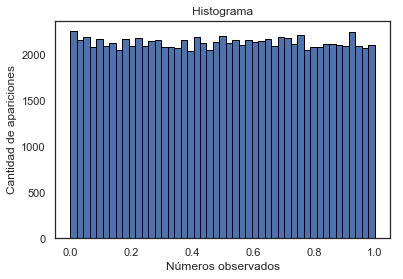

In [6]:
#Histograma de los 100 valores generados anteriormente
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')

sns.distplot(randomNums1,  kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

### Ejercicio 2
Utilizar el generador de números al azar implementado en el ejercicio 1 para simular el lanzamiento de 2 dados, luego de lo
cual se realiza la suma de los valores obtenidos en cada uno.
* Defina el espacio muestral del experimento
* Genere 10000 pares de lanzamientos
* Realice un histograma con las frecuencias obtenidas para cada uno de los valores posibles


In [97]:
import random

In [107]:
print("Espacio Muestral Suma valores de los Dados: ", [2,3,4,5,6,7,8,9,10,11,12])

Espacio Muestral Suma valores de los Dados:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [98]:
def dado(numero):
    if(numero < 1/6) : return 1
    if(numero < 2/6) : return 2
    if(numero < 3/6) : return 3
    if(numero < 4/6) : return 4
    if(numero < 5/6) : return 5
    return 6

In [100]:
import random
#10.000 valores random generados entre 0 y 1
listado_dado1 = []
listado_dado2 = []
for i in range(0,10000):
    dado1 = U(random.randrange(10000))
    dado2 = U(random.randrange(10000))

    listado_dado1.insert(i,dado(dado1/m))
    listado_dado2.insert(i,dado(dado2/m))

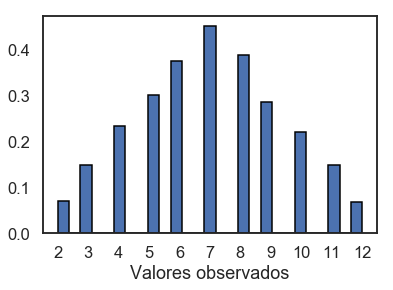

In [115]:
sumatoria = []
for i in range (0,10000):
    sumatoria.append(listado_dado1[i] + listado_dado2[i])
    

fig, ax = plt.subplots()
sns.distplot(sumatoria,    kde=False,  hist_kws={'edgecolor':'black', 'alpha':1}, ax=ax, norm_hist=True) 
sns.set(style="white", context="talk")
plt.xlabel('Valores observados')
ax.set_xticks(range(2,13))
plt.show()

### Ejercicio 6
Realizar  un  test  $Chi^{2}$ a la  distribución  empírica  implementada  en  el  Ej  2, y  analizar  el  resultado  indicando  si  la  distribución puede o no ser aceptada. 
* Considerar un nivel de significación del 1%. 
* Determine qué nivel de significación cambiaría el resultado de la prueba de hipótesis.

---
El **Test Estadístico $Chi^{2}$** se aplica cuando tenemos una muestra de una **variable aleatoria discreta finita** y queremos evaluar si responde a una determinada distribución de probabilidad teórica.

En este caso vamos a ver si la muestra que se generó en el ejercicio 6, responde a una **distribución geométrica** .

Primero se debe medir la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 

**Pearson** (1900) demostró que $D^{2}$ responde a una distribución de tipo $Chi^{2}$, por lo tanto, encontramos $\textbf{t}$ tal que  $P(D^{2} > t) = \alpha$  y aceptamos la hipótesis siempre que $D^{2} < t$.

In [116]:
probabilidades = {
    2 : 1/36,
    3 : 2/36,
    4 : 3/36,
    5 : 4/36,
    6 : 5/36,
    7 : 6/36,
    8 : 5/36,
    9 : 4/36,
    10 : 3/36,
    11 : 2/36,
    12 : 1/36
}

In [123]:
cantidades_esperadas = {}
for i in range (2,13):
    cantidades_esperadas[i] = probabilidades[i] * 10000

In [124]:
cantidades_esperadas

{2: 277.77777777777777,
 3: 555.5555555555555,
 4: 833.3333333333333,
 5: 1111.111111111111,
 6: 1388.888888888889,
 7: 1666.6666666666665,
 8: 1388.888888888889,
 9: 1111.111111111111,
 10: 833.3333333333333,
 11: 555.5555555555555,
 12: 277.77777777777777}

In [127]:
obtenidos = {
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
}

for elemento in sumatoria:
    obtenidos[elemento] += 1

In [128]:
obtenidos

{2: 265,
 3: 549,
 4: 868,
 5: 1121,
 6: 1394,
 7: 1674,
 8: 1441,
 9: 1058,
 10: 822,
 11: 555,
 12: 253}

In [129]:
d2 = 0
n = 10000

for i in range(2,13):
    d2 += ((obtenidos[i] - cantidades_esperadas[i])**2) / cantidades_esperadas[i]

In [175]:
from scipy.stats import chi2
limiteSuperior = chi2.ppf(0.99, df=10)
print("Estadistico: {:.2f} ".format(d2))
if d2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
else:
     print("El test rechaza la hipótesis nula")

Estadistico: 9.11 
El test acepta la hipotesis nula.


In [176]:
print("Valor p: {}".format(1-chi2.cdf(d2, df=10)))

Valor p: 0.5221553735156393


In [185]:
limiteSuperior = chi2.ppf(0.47, df=10)
print("Estadistico: {:.2f} ".format(d2))
if d2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
else:
     print("El test rechaza la hipótesis nula")

Estadistico: 9.11 
El test rechaza la hipótesis nula


Conclusión: Solo realizaríamos para valores mayores a este p valor: 0.5221553735156393. De todas maneras entendemos que no se utiliza valores mayores a este.